In [ ]:
import torch
import numpy as np

zeros = np.zeros(shape=(10,10))
print(zeros)
tensor_pytorch = torch.tensor(zeros)
print(tensor_pytorch)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)


In [ ]:
import torchvision
from torchvision import transforms

transform = transforms.Compose([
transforms.RandomHorizontalFlip(),
transforms.RandomRotation(25),
transforms.ToTensor(),
transforms.Normalize((0.5), (0.5))
])

my_dataset = torchvision.datasets.MNIST(root=".",train=True,download=True, transform= transform)
## PILToTensor

data_loader = torch.utils.data.DataLoader(my_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=1)

batch_of_tensors = next(iter(data_loader))[0].numpy()

from google.colab.patches import cv2_imshow
#cv2_imshow()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


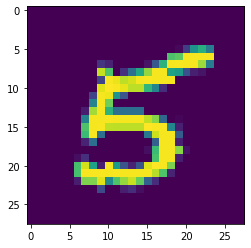

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    #img = img / 2 + 0.5 # unnormalize
    plt.imshow(img) # convert from Tensor image 

imshow(np.squeeze(np.swapaxes(batch_of_tensors[4],0,2).T))

In [ ]:
### Architecture
    ### Layers 
    ### nn.Conv2d Basic necessary layer
    ### softmax
    ### linear
    ### 
### Activation Functions 
### Optimizer
### Loss
### Training loop 
### Validation and Testing 


In [ ]:
batch_of_tensors.shape

(32, 1, 28, 28)

In [ ]:
import torchvision
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

mnist_train = torchvision.datasets.MNIST(root= ".", train = True, download=True, transform= transform)
mnist_test = torchvision.datasets.MNIST(root= ".", train = False, download = True, transform= transform)

# generate indices: instead of the actual data we pass in integers instead
train_indices, val_indices, _, _ = train_test_split(
    range(len(mnist_train)),
    mnist_train.targets,
    stratify=mnist_train.targets,
    test_size=10000,
)

# generate subset based on indices
train_split = Subset(mnist_train, train_indices)
val_split = Subset(mnist_train, val_indices)


train_loader = torch.utils.data.DataLoader(train_split,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=1)

valid_loader = torch.utils.data.DataLoader(val_split,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=1)

test_data_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=1)

In [ ]:
len(mnist_train)

60000

In [ ]:
train_indices, val_indices, _, _ = train_test_split(
    range(60000),
    mnist_train.targets,
    stratify=mnist_train.targets,
    test_size=10000,
)

In [ ]:
val_indices

[33134,
 13592,
 30400,
 7188,
 12845,
 21986,
 2221,
 43872,
 59793,
 135,
 19489,
 45708,
 26165,
 25199,
 7801,
 51075,
 52483,
 39347,
 6837,
 37248,
 35389,
 41286,
 16555,
 33583,
 10611,
 38104,
 15062,
 56554,
 43226,
 18131,
 3138,
 54203,
 8844,
 29568,
 29711,
 23255,
 4977,
 56929,
 8962,
 36855,
 21473,
 30865,
 54833,
 17400,
 752,
 27191,
 25526,
 32987,
 11738,
 52946,
 57326,
 12165,
 2833,
 47325,
 4209,
 38944,
 14496,
 41155,
 32937,
 57398,
 32365,
 4662,
 18610,
 6662,
 20115,
 57020,
 43651,
 47589,
 40820,
 280,
 57540,
 6412,
 6557,
 46142,
 14817,
 400,
 17051,
 28585,
 59574,
 56776,
 21436,
 34628,
 12265,
 40068,
 23784,
 45888,
 46881,
 29964,
 26195,
 42957,
 13003,
 7117,
 40666,
 3465,
 32663,
 20609,
 16382,
 6438,
 5473,
 56516,
 54249,
 14346,
 50983,
 26375,
 57054,
 5012,
 39089,
 8347,
 20470,
 43225,
 16821,
 41049,
 20566,
 41520,
 53358,
 50830,
 24365,
 11446,
 49581,
 9153,
 5636,
 1800,
 48053,
 34215,
 21324,
 35137,
 27427,
 26,
 15421,
 3

In [ ]:
1 * 1,10 10 __10,20__  20 _____ X _____ 1

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


train_on_gpu = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

        # max pooling layer
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.pool3 = nn.MaxPool2d(4, 4)

        self.softmax = nn.Softmax()

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.linear2 = nn.Linear(32, 32)
        self.linear3 = nn.Linear(32,10)

        #self.relu = nn.ReLU()


    def forward(self, x):
        # add sequence of convolutional and max pooling layers

        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        x = self.flatten(x)

        x = self.linear1(x)
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        x = F.softmax(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (softmax): Softmax(dim=None)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
# Thanks to https://stackoverflow.com/questions/56450969/how-to-calculate-output-sizes-after-a-convolution-layer-in-a-configuration-file/56452756

import torch
from torch import nn

import functools
import operator

def shape_of_output(shape_of_input, list_of_layers):
    sequential = nn.Sequential(*list_of_layers)
    return tuple(sequential(torch.rand(1, *shape_of_input)).shape)

def size_of_output(shape_of_input, list_of_layers):
    return functools.reduce(operator.mul, list(shape_of_output(shape_of_input, list_of_layers)))

import random
out_channel_of_first = random.randint(1,16)
kernel_size_of_first = random.choice([3,5,7,11])
grayscale_image_shape = (1, 28, 28)
color_image_shape     = (3, 48, 48) # alternative example

# 
# example usage
# 
print('the output shape will be', shape_of_output(
    shape_of_input=grayscale_image_shape,
    list_of_layers=[         
        nn.Conv2d(1, 16, 3, padding=1),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, 3, padding=1),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, 3, padding=1),
        nn.MaxPool2d(4, 4),

        nn.Flatten()
    ],
))


the output shape will be (1, 64)


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model, input_size=(32, 1, 28, 28))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      --                        --
├─Conv2d: 1-1                            [32, 16, 28, 28]          160
├─MaxPool2d: 1-2                         [32, 16, 14, 14]          --
├─Conv2d: 1-3                            [32, 32, 14, 14]          4,640
├─MaxPool2d: 1-4                         [32, 32, 7, 7]            --
├─Conv2d: 1-5                            [32, 64, 7, 7]            18,496
├─MaxPool2d: 1-6                         [32, 64, 1, 1]            --
├─Flatten: 1-7                           [32, 64]                  --
├─Linear: 1-8                            [32, 128]                 8,320
├─Linear: 1-9                            [32, 256]                 33,024
├─Linear: 1-10                           [32, 10]                  2,570
Total params: 67,210
Trainable params: 67,210
Non-trainable params: 0
Total mult-adds (M): 63.52
Input size (MB): 0.10
Forward/backward p

In [ ]:
1,256 ** (256,10)  = 1,10
2560 + 10 = 2570

SyntaxError: ignored

In [ ]:
import torch.optim as optim

# specify loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

# specify optimizer
criterion = nn.CrossEntropyLoss()

In [ ]:
# number of epochs to train the model
n_epochs = 10 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 	Training Loss: 1.730904 	Validation Loss: 1.614041
Validation loss decreased (inf --> 1.614041).  Saving model ...
Epoch: 2 	Training Loss: 1.584629 	Validation Loss: 1.594939
Validation loss decreased (1.614041 --> 1.594939).  Saving model ...
Epoch: 3 	Training Loss: 1.564550 	Validation Loss: 1.558665
Validation loss decreased (1.594939 --> 1.558665).  Saving model ...
Epoch: 4 	Training Loss: 1.564021 	Validation Loss: 1.548006
Validation loss decreased (1.558665 --> 1.548006).  Saving model ...
Epoch: 5 	Training Loss: 1.556932 	Validation Loss: 1.554451
Epoch: 6 	Training Loss: 1.559897 	Validation Loss: 1.570064
Epoch: 7 	Training Loss: 1.574370 	Validation Loss: 1.593158
Epoch: 8 	Training Loss: 1.569305 	Validation Loss: 1.550008
Epoch: 9 	Training Loss: 1.575609 	Validation Loss: 1.574688
Epoch: 10 	Training Loss: 1.580753 	Validation Loss: 1.573393
